# Анализ данных о чтении и прослушивании контента в сервисе Яндекс Книги

- Автор: Логинов Павел Александрович
- Дата: 08.05.2025

## Введение

### Цели и задачи проекта

**Цель проекта**: 

*Часть 1. Проверка гипотезы в Python и составление аналитической записки*

Проверка гипотезы о среднем времени чтения и прослушивания книг в приложении сервиса Яндекс Книги среди пользователей из Москвы и Санкт-Петербурга

*Часть 2. Анализ результатов A/B-тестирования*

Анализ результатов A/B-тестирования интернет-магазина BitMotion Kit

**Задачи проекта**:

*Часть 1. Проверка гипотезы в Python и составление аналитической записки*

- Загрузить и изучить данные
- Проверить гипотезу
- Составить аналитическую записку

*Часть 2. Анализ результатов A/B-тестирования*

- Загрузить данные и оценить их целостность
- Оценить корректность проведения A/B-тестирования
- Провести оценку результатов A/B-тестирования

### Описание данных

Файл `/datasets/yandex_knigi_data.csv` содержит данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания):

- `Unnamed: 0` - порядковый номер строки;
- `city` - город или регион географического положения;
- `puid` - идентификатор пользователя;
- `hours` - длительность чтения или прослушивания в часах.

Файл `/datasets/ab_test_participants.csv` содержит данные об участниках A/B-тестирования:

- `user_id` — идентификатор пользователя;
- `group` — группа пользователя;
- `ab_test` — название теста;
- `device` — устройство, с которого происходила регистрация.

Архив `/datasets/ab_test_events.zip` содержит один csv-файл с данными о событиях 2020 года:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии.

### Содержимое проекта

1. Часть 1. Проверка гипотезы в Python и составление аналитической записки
- 1.1. Загрузка данных и знакомство с ними
- 1.2. Проверка гипотезы в Python
- 1.3. Аналитическая записка
2. Часть 2. Анализ результатов A/B-тестирования
- 2.1. Описание целей исследования
- 2.2. Загрузка данных и оценка их целостности
- 2.3. Оценка корректности проведения теста
- 2.4. Оценка результатов A/B-тестирования

---

## Часть 1. Проверка гипотезы в Python и составление аналитической записки

### 1.1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотеки `pandas` (для работы со структурированными табличными данными), `matplotlib` (для визуализации данных), `numpy` (для работы с массивами и выполнения математических операций), `ttest_ind` (для проведения статистического t-теста с двумя выборками), `mannwhitneyu` (для проведения непараметрического теста с двумя выборками), `proportions_ztest` (для проведения статистического Z-теста пропорций с двумя выборками) и датасета `yandex_knigi_data.csv`. Данные датасета сохраним в переменной `df`

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Выгружаем данные в переменные
try:
    df = pd.read_csv('C:/Users/Student/Desktop/yandex_knigi_data.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

Познакомимся с данными датасета `yandex_knigi_data.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран

df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
# Выводим информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


Датафрейм `df` содержит 4 столбца и 8783 строки, в котором представлена информация о данных пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания)

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов `city`. `puid`, `hours` приведены к единому виду. Названия столбца `Unnamed: 0` не приведено к единому виду. Исходя из специфики данных, можно сделать вывод о том, что в данном столбце содержится порядковый номер строки. Поэтому определим данный столбец как индекс
- Все представленные данные хранятся в типах данных `int64` (целочисленные значения), `object` (строковые данные) или `float64` (числовые значения с плавающей точкой).

- **Строковые данные (object).** 1 столбец имеет тип данных `object`:
    - `city` - город географического положения (Москва или Санкт-Петербург);
    
Для данного столбца верно подобран строковый тип данных, поскольку отображается текстовая информация, которая не может быть представлена в числовом формате

- **Целочисленные значения (int64).**. 2 столбца имеют тип данных `int64`:
    - `Unnamed: 0` - порядковый номер строки;
    - `puid` - идентификатор пользователя;
    
Для данных столбцов верно подобран целочисленный тип данных, поскольку отображается числовая информация о порядковом номере и идентификаторе, которые являются целыми числами (без дробной части)
    
- **Числовые значения с плавающей точкой (float64).** 1 столбец имеет тип данных `float64`:
    - `hours` - длительность чтения или прослушивания в часах.

Для данного столбца верно подобран числовой тип данных с плавающей точкой, поскольку длиительность чтения или прослушивания может выражаться не только в формате целого числа, но и дробного, включающего в себя не только часы, но и минуты

- Столбцы датафрейма не содержат пропусков
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Однако стоит проверить наличие дубликатов в идентификаторах пользователей, а также сравнить размеры групп и их статистики.

Исходя из выводов по первичному анализу данных, выполним следующие преобразования:

- Определим столбец `Unnamed: 0` как индекс
- Проверим наличие дубликатов в идентификаторах пользователей, а также сравнить размеры групп и их статистики.

In [5]:
# Определяем столбец `Unnamed: 0` как индекс

df = df.set_index('Unnamed: 0')

Проверим наличие дубликатов в идентификаторах пользователей

In [6]:
# Проверяем наличие дубликатов в идентификаторах пользователей

dupl = df['puid'].duplicated().sum()
dupl

244

Можем заметить, что в столбце `puid` обнаружено 244 дубликата. Для проверки гипотезы необходимо учитывать только уникальных пользователей. Поэтому удалим имеющиеся дубликаты

In [7]:
# Удаляем дубликаты в столбце с идентификаторами пользователей

df = df.drop_duplicates(subset = 'puid')

Проверяем, что в этом столбце дубликатов нет

In [8]:
# Проверяет отсутствие дубликатов

dupl1 = df['puid'].duplicated().sum()
dupl1

0

Затем сравниваем размеры групп в абсолютном и процентном соотношении

In [9]:
count_city = df['city'].value_counts()
display(count_city)
prop_count_city = df['city'].value_counts()/df['city'].count()
display(prop_count_city)

Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64

Москва             0.729977
Санкт-Петербург    0.270023
Name: city, dtype: float64

Мы можем увидеть, что выборка пользователей из Москвы включает в себя 6234 пользователя, а из Санкт-Петербурга - 2306 пользователей. Размер выборок отличается более чем на 40%, однако это не мешает проверить гипотезу, поскольку при достаточно большом количестве наблюдений (обычно более 30) центральная предельная теорема (ЦПТ) гарантирует, что у выборочного среднего будет нормальное распределение. Количество наблюдений в наших выборках сильно превышает значение 30

Ознакомимся с обновлёнными данными датасета `yandex_knigi_data.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [10]:
# Выводим первые строки датафрейма на экран

df.head()

,city,puid,hours
Unnamed: 0,,,
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [11]:
# Выводим информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8540 non-null   object 
 1   puid    8540 non-null   int64  
 2   hours   8540 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.9+ KB


Таким образом, мы получаем обновлённый датафрейм, который содержит в себе 3 столбца (столбец 'Unnamed: 0' определили как индекс) и 8540 строк (из-за удаления дубликатов). Названия столбцов приведены к единому виду, пропуски в столбцах - отсутствуют, все столбцы имеют корректный тип данных

### 1.2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Докажем это статистически, используя одностороннюю проверку гипотезы с двумя выборками

Cоздадим два среза данных: пользователи, которые входят в группу A (Санкт-Петербург), пользователи, которые входят в группу B (Москва)

In [12]:
# Создаём срезы данных

group_a = df[df['city'] == 'Санкт-Петербург']
group_b = df[df['city'] == 'Москва']

Теперь проверим, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Для этого сформулируем нулевую и альтернативную гипотезу:

- Нулевая гипотеза H₀: Средняя активность пользователей в Санкт-Петербурге не больше, чем в Москве

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Для выбора подходящего статистического теста изучим выбросы в двух выборках. Начнём с группы A

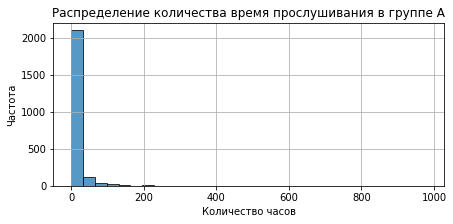

count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
80%         9.102964
85%        15.218584
90%        28.070483
95%        56.545642
96%        62.213175
97%        81.399764
98%       102.444175
99%       146.847159
max       978.764775
Name: hours, dtype: float64

In [13]:
# Изучаем выбросы в группе A

plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
group_a['hours'].plot(
                kind='hist', # Тип графика — гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение количества время прослушивания в группе A')
plt.xlabel('Количество часов')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

group_a['hours'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

Мы можем заметить, что у 99% пользователей количество часов прослушиваний не превышает 146 часов. Однако максимальное значение равно 978 часам. Вероятно, что данное значение является выбросом, который не нужно учитывать при проверки гипотезы. Исходя из этого, мы можем сделать вывод о том, что для проверки гипотезы наиболее подходящим тестом будет являться устойчивый к выбросам (нечувствительный к выбросам) тест Манна-Уитни, который можно применять к любым числовым данным, поскольку он не требует нормальности выборочных средних. Перед этим изучим выбросы в группе B

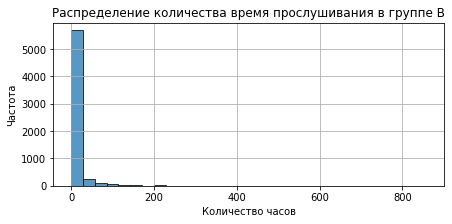

count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
80%         8.772156
85%        13.787899
90%        24.337397
95%        54.871469
96%        67.189784
97%        83.293019
98%       112.667548
99%       158.361304
max       857.209373
Name: hours, dtype: float64

In [14]:
# Изучаем выбросы в группе B

plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
group_b['hours'].plot(
                kind='hist', # Тип графика — гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение количества время прослушивания в группе B')
plt.xlabel('Количество часов')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

group_b['hours'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

Мы можем заметить, что у 99% пользователей количество часов прослушиваний не превышает 158 часов. Однако максимальное значение равно 857 часам. Вероятно, что данное значение является выбросом, который (также как и в случае с группой A) не нужно учитывать при проверки гипотезы. Теперь мы убедились, что тест Манна-Уитни подойдёт для проверки гипотезы

Далее сравним дисперсии двух выборок

In [15]:
# Вычислим дисперсии выборок

sample_variance_a = group_a.var(ddof = 1)
print('Дисперсия выборки:', sample_variance_a)

sample_variance_b = group_b.var(ddof = 1)
print('Дисперсия выборки:', sample_variance_b)

Дисперсия выборки: puid     6.064588e+27
hours    1.586569e+03
dtype: float64
Дисперсия выборки: puid     1.257506e+28
hours    1.358047e+03
dtype: float64


Так как выборки A и B отличаются по размеру, содержат в себе выбросы, а дисперсии этих двух выборок - различаются, мы можем использовать тест Манна-Уитни, который позволит сделать вывод о распределении метрики

In [16]:
# Выборка столбца hours для группы А
sample_a = group_a['hours']
# Выборка столбца hours для группы B
sample_b = group_b['hours']

# Применяем тест Манна — Уитни

test_result = mannwhitneyu(
    sample_a,
    sample_b,
    alternative='greater', # HO: mu_a <= mu_b, H1: mu_a > mu_b    
)

# Фиксируем уровень значимости
alpha = 0.05

if test_result.pvalue > alpha:
    print(f'pvalue = {test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'pvalue = {test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue = 0.6189600878052618 > 0.05
Не получилось отвергнуть нулевую гипотезу


Так как pvalue = 0.6189600878052618 > 0.05, мы можем сделать вывод о том, что нулевую гипотезу отвергнуть не получилось. Это значит, что средняя активность пользователей в Санкт-Петербурге не больше, чем в Москве при заданном уровне значимости alpha = 0.05

### 1.3. Аналитическая записка

По результатам анализа данных составлена аналитическая записка, включающая в себя следующую информацию:

- Выбранный тип теста - непараметрический тест Манна-Уитни для проверки гипотез с двумя выборками (устойчив к выбросам). Уровень статистической значимости - 5%
- Результат теста - не получилось отвергнуть нулевую гипотезу, так как pvalue = 0.6189600878052618 > 0.05, то есть, выше заданного уровня значимости
- Cредняя активность пользователей в Санкт-Петербурге не больше, чем в Москве
- Причины, объясняющие полученные результаты:
    - Различия в объёмах выборок: размер выборки, состоящей из пользователей Санкт-Петербурга, более чем на 40% меньше, чем размер выборки, состоящей из пользователей Москвы. Возможно, при увеличении количества наблюдений активности пользователей Санкт-Петербурга непараметрический тест Манна-Уитни подтвердил бы то, что средняя активность пользователей в Санкт-Петербурге - больше, и это различие статистически значимо
    - Различия в выборочных дисперсиях: больший разброс значений среди наблюдений активности пользователей из Санкт-Петербурга повлиял на среднее данной выборки, из-за чего непараметрический тест Манна-Уитни не подтвердил, что средняя активность пользователей в Санкт-Петербурге - больше, и это различие статистически значимо
    - Различия в датах активности: датафрейм, на основе которого была проведена проверка гипотезы, не включал в себя информацию о дате события. Сезонные или временные факторы могли повлиять на изменение длительности чтения или прослушивания в часах только в одной из двух выборок

----

## Часть 2. Анализ результатов A/B-тестирования

### 2.1. Цели исследования

**Цель исследования**: изучение результатов A/B-тестирования интернет-магазина BitMotion Kit для оценки:
- изменения пользовательской активности в тестовой группе по сравнению с контрольной 
- достижения ожидаемого эффекта в изменении конверсии

### 2.2. Загрузка данных и оценка их целостности

Начнём с загрузки датасетов `/datasets/ab_test_participants.csv` и `/datasets/ab_test_events.zip`. Данные датасетов сохраним в два датафрейма - `participants` и `events` соответственно

In [17]:
# Выгружаем данные в переменные

participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

Оценим целостность датасета `ab_test_participants.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [18]:
# Выводим первые строки датафрейма на экран

participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [19]:
# Выводим информацию о датафрейме

participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


Датасет `ab_test_participants.csv` не содержит пропусков. Однако по первый строкам мы видим, что в таблице находятся результаты не только одного теста. Изучим этот столбец на уникальные значения

In [20]:
participants_ab_test_unique = participants['ab_test'].unique()
participants_ab_test_unique

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

Так как в данных представлены результаты двух тестов, следует убедиться, что нет пользователей, попавших в оба теста сразу. В частности, нас интересует, есть ли пользователи, попавшие в группу В в двух тестах сразу. Если такие пользователи будут, по ним мы не сможем оценить эффект от нововведения, так как не сможем понять, под воздействием какого нововведения было совершено целевое событие - от изменений в нашем тесте или в конкурирующем. Таких пользователей лучше всего удалить для корректной оценки метрик нашего теста. Для этого разделим датасет `ab_test_participants.csv` на два датафрейма - участники тестовой группы B, которые участвуют в тесте `interface_eu_test` и участники тестовой группы B, которые участвуют в тесте `recommender_system_test` и посмотрим на пересечения участников в этих группах

In [21]:
# Проверяем пересечения между двумя группами

group_interface_eu_test = participants[(participants['group'] == 'B')&(participants['ab_test'] == 'interface_eu_test')]['user_id']
group_recommender_system_test = participants[(participants['group'] == 'B')&(participants['ab_test'] == 'recommender_system_test')]['user_id']

intersection = list(set(group_interface_eu_test) & set(group_recommender_system_test))
print(intersection)

['C74B6E95352ADE79', '4122B8F30EB2271C', 'FE8F9858BBE502D9', '13FBEB715F4AAE10', '9F0571C70D4BD33B', '72742C5F312A1FEC', '24FB1A84E1C30291', '902F92052587344F', '1AD9F88DA92AC4E5', 'EE9E527A761299B2', '1D831F7D0F539AFA', 'F71DD44DAB783CEB', '8FC9D1BB3017BE66', 'C7750723906C925A', 'E0272BC86CC88DC7', '3B3F68DC5779E517', '63F5FC15B31DB5A6', '3DEA2F9B3EDA8B91', '38189578561F38CB', '0C2E77C6A381704A', 'BA98FD8F84C838C7', 'BE0FDC8CC0D5455D', 'EE25BC8FA059151D', 'ABB61823786179CC', '4CF756542084F860', 'A8C25A605F613665', '53732758D90FB1E4', 'DD4352CDCF8C3D57', 'E1EA339E17C0D568', '430C998549E88DAE', 'BA9906DF9975512E', 'A35BD08F60AC00B8', '14AEC962812EB706', '565EF59DDD36B95B', '4FE90CB247C78EC5', 'C1E43A9B1D675927', 'E391353FC3A4056D', 'EF449601C94D2496', '23E633E92EDCD195', 'EAFB9027A27D510C', '502902B3C32C72FF', '0A0141A363E2E051', '115ABCFDBDDB5950', 'BBE0583F0240AABB', '94464DF2E5398E26', 'C89E24F4C723CEF4', 'FC2DA0D7EF375B27', '886E52074D084B18', '59D9BD2A3172D3F4', '894A2506B3A50D03',

Мы видим, что есть пользователи, попавшие в оба теста сразу. Для корректной оценки метрик нашего теста удалим этих пользователей из обеих групп

In [22]:
# Удаляем пересечения

participants = participants[~participants['user_id'].isin(intersection)] 

Убедимся, что пересечений больше нет

In [23]:
# Проверяем пересечения между двумя группами

group_interface_eu_test = participants[(participants['group'] == 'B')&(participants['ab_test'] == 'interface_eu_test')]['user_id']
group_recommender_system_test = participants[(participants['group'] == 'B')&(participants['ab_test'] == 'recommender_system_test')]['user_id']

intersection = list(set(group_interface_eu_test) & set(group_recommender_system_test))
print(intersection)

[]


Пересечений пользователей, попавших в оба теста сразу из группы B - нет

Далее оценим целостность датасета `ab_test_events.zip.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [24]:
# Выводим первые строки датафрейма на экран

events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [25]:
# Выводим информацию о датафрейме

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


Датасет `ab_test_events.zip.csv` содержит пропуски только в одном столбце - `details`. Однако удалить строки с пропущенными значениями в данном столбце или заменить пропуски на какое-либо значением мы не можем, поскольку в данном столбце содержатся дополнительные данные о событиях в формате строковых данных `object`

Проверим датасет `ab_test_events.zip.csv` на наличие дубликатов

In [26]:
# Проверяем наличие дубликатов

duplicates_events = events.duplicated().sum()
duplicates_events

36318

Обнаружено 36318 дубликатов. Удалим данные дубликаты

In [27]:
# Удаляем дубликаты

events = events.drop_duplicates()

Проверим, что дубликаты - удалены

In [28]:
# Проверяем наличие дубликатов

duplicates_events = events.duplicated().sum()
duplicates_events

0

Дубликаты в датасете `ab_test_events.zip.csv` - отсутствуют

### 2.3. Оценка корректности проведения теста по таблице `ab_test_participants`

Выделим пользователей, участвующих в тесте `interface_eu_test` в отдельный датафрейм под названием `ab_test_participants`

In [29]:
# Выделяем пользователей, участвующих в тесте `interface_eu_test` в отдельный датафрейм

ab_test_participants = participants[participants['ab_test'] == 'interface_eu_test']

Проверим, чтобы в новом датафрейме были только пользователи, участвующие в тесте `interface_eu_test`

In [30]:
# Проверяем, чтобы в новом датафрейме были только пользователи, участвующие в тесте `interface_eu_test`

ab_test_participants_unique = ab_test_participants['ab_test'].unique()
ab_test_participants_unique

array(['interface_eu_test'], dtype=object)

Убедимся, что в новой датафрейме всего 2 группы - контрольная (A) и тестовая (B)

In [31]:
# Проверяем уникальные значения в столбце group

ab_test_participants_group = ab_test_participants['group'].unique()
ab_test_participants_group

array(['B', 'A'], dtype=object)

Так мы убедились, что таблица `ab_test_participants` соответствует требованиям технического задания

Затем рассчитаем количество уникальных пользователей в каждой из экспериментальных групп

In [32]:
# Рассчитываем количество уникальных пользователей

count_test_group = ab_test_participants.groupby('group')['user_id'].nunique()
count_test_group

group
A    5383
B    5351
Name: user_id, dtype: int64

Исходя из вычислений, можем увидеть, что в контрольной группе (А) содержится 5383 уникальных пользователей, а в тестовой группе (B) содержится 5351 уникальный пользователь

Рассчитаем и выведем на экран процентную разницу в количестве пользователей в группах A и B

Для расчёта процентной разницы воспользуемся формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [33]:
# Рассчитываем процентную разницу в количестве пользователей в группах A и B

A = ab_test_participants[ab_test_participants['group'] == 'A']['user_id'].nunique()
B = ab_test_participants[ab_test_participants['group'] == 'B']['user_id'].nunique()

difference_a_b = 100 * (abs(A-B)/A)
difference_a_b

0.5944640535017648

Расхождение стало более наглядным — кажется, оно небольшое (меньше 1% - соответственно, соблюдена равномерность распределения пользователей по группам теста), и им можно пренебречь. 

Тем не менее стоит проверить, возможно, дело в пользователях, которые могли попасть в обе группы

In [34]:
# Проверяем пересечения между двумя группами

a1 = ab_test_participants[ab_test_participants['group'] == 'A']['user_id']
b1 = ab_test_participants[ab_test_participants['group'] == 'B']['user_id']

intersection_1 = list(set(a1) & set(b1))
print(intersection_1)

[]


После выполнения данного кода мы видим, что пользователей, которые встречаются одновременного в группах A и B - нет

Проверим датафрейм `ab_test_participants` на наличие дубликатов в столбце с идентификаторами пользователей

In [35]:
ab_test_participants['user_id'].duplicated().sum()

0

Дубликаты - отсутствуют

Таким образом, мы делаем вывод о том, что в датафрейме `ab_test_participants`:

- Содержатся данные, которые соответствуют требованиям технического задания
- Равномерность распределения пользователей по группам теста - соблюдена
- Пересечений с конкурирующим тестов - не выявлено

### 2.4. Анализ данных о пользовательской активности по таблице `ab_test_events`

Создадим датафрейм `ab_test_events`, в котором будут только те события, которые связаны с участвующими в изучаемом тесте пользователями

In [36]:
# Создаём датафрейм ab_test_events, выводим информацию о нём и первые строки

ab_test_events = events[events['user_id'].isin(ab_test_participants['user_id'])]
ab_test_events = ab_test_events[(ab_test_events['event_name'] == 'registration') | (ab_test_events['event_name'] == 'purchase')]
ab_test_events.info()
ab_test_events.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20261 entries, 64672 to 777488
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     20261 non-null  object        
 1   event_dt    20261 non-null  datetime64[ns]
 2   event_name  20261 non-null  object        
 3   details     20261 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 791.4+ KB


,user_id,event_dt,event_name,details
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
64946,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32
67873,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0


Новый датафрейм `ab_test_events` содержит только события, которые связаны с участвующими в изучаемом тесте пользователями, взятыми из датафрейма `ab_test_participants`. Количество этих событий - 21075

### 2.5. Определение горизонта анализа

Определим горизонт анализа: рассчитаем время (лайфтайм) совершения события пользователем после регистрации и оставим только те события, которые были выполнены в течение первых семи дней с момента регистрации

Для начала извлечём события регистрации

In [37]:
# Извлекаем события регистрации

registration_dt = ab_test_events[ab_test_events['event_name'] == 'registration'][['user_id', 'event_dt']].rename(columns={'event_dt': 'registration_dt'})
registration_dt

,user_id,registration_dt
64672,5F506CEBEDC05D30,2020-12-06 14:10:01
64946,51278A006E918D97,2020-12-06 14:37:25
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22
67873,275A8D6254ACF530,2020-12-06 19:36:54
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20
...,...,...
654517,52B5A81EFC31AF1D,2020-12-23 23:44:45
654518,B1D88FBD4BA58E1B,2020-12-23 23:44:47
654581,38CA3A3C4FE3FEFD,2020-12-23 23:47:47
654640,16CCB1C8C4DCF1AF,2020-12-23 23:50:29


Объединим данные с регистрациями с датафреймом `ab_test_events`

In [38]:
# Объединяем данные с регистрациями с датафреймом `ab_test_events`

ab_test_events = ab_test_events.merge(registration_dt, on='user_id', how='left')
ab_test_events

,user_id,event_dt,event_name,details,registration_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20
...,...,...,...,...,...
20256,5C31C0607EFC3C98,2020-12-30 02:13:55,purchase,4.29,2020-12-07 20:20:40
20257,4584E51B99DE51AE,2020-12-30 07:48:27,purchase,8.99,2020-12-07 11:37:58
20258,F80C9BDDEA02E53C,2020-12-30 10:01:32,purchase,4.49,2020-12-07 10:05:54
20259,F80C9BDDEA02E53C,2020-12-30 10:02:43,purchase,4.49,2020-12-07 10:05:54


Далее вычислим разницу во времени в днях между событием и регистрацией

In [39]:
# Вычисляем разницу во времени в днях между событием и регистрацией

ab_test_events['after_registration_dt'] = (ab_test_events['event_dt'] - ab_test_events['registration_dt']).dt.days
ab_test_events

,user_id,event_dt,event_name,details,registration_dt,after_registration_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0
...,...,...,...,...,...,...
20256,5C31C0607EFC3C98,2020-12-30 02:13:55,purchase,4.29,2020-12-07 20:20:40,22
20257,4584E51B99DE51AE,2020-12-30 07:48:27,purchase,8.99,2020-12-07 11:37:58,22
20258,F80C9BDDEA02E53C,2020-12-30 10:01:32,purchase,4.49,2020-12-07 10:05:54,22
20259,F80C9BDDEA02E53C,2020-12-30 10:02:43,purchase,4.49,2020-12-07 10:05:54,22


Оставим только те события, которые были выполнены в течение первых семи дней с момента регистрации

In [40]:
# Фильтруем события за первые семь дней с момента регистрации

ab_test_events = ab_test_events[ab_test_events['after_registration_dt'] <= 6]
ab_test_events

,user_id,event_dt,event_name,details,registration_dt,after_registration_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0
...,...,...,...,...,...,...
20155,96371D85BF5A99DD,2020-12-29 19:11:11,purchase,4.49,2020-12-23 13:16:19,6
20157,96371D85BF5A99DD,2020-12-29 19:12:42,purchase,89.99,2020-12-23 13:16:19,6
20165,2CD92B2BD7A136C2,2020-12-29 19:47:22,purchase,4.49,2020-12-22 22:27:30,6
20166,2CD92B2BD7A136C2,2020-12-29 19:47:38,purchase,4.49,2020-12-22 22:27:30,6


Получаем обновлённый датафрейм `ab_test_events` с событиями регистрации и покупок, выполненных в течение первых семи дней с момента регистрации

### 2.6. Оценка достаточности выборки

Оценим достаточность выборки для получения статистически значимых результатов A/B-теста при заданных параметрах:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

- минимальный детектируемый эффект, или MDE, — 3% (ожидаемый эффект от нововведения - увеличение конверсии зарегистрированных пользователей в покупателей как минимум на 3 процентных пункта);

Для оценки достаточности выборки для получения статистически значимых результатов A/B-теста был использован калькулятор Эвана Миллера, предназначенный для расчёта размера выборки А/B-теста строго с долевой метрикой (в нашем случае - конверсия). При заданных параметрах минимальный размер выборки составил 3692 пользователя на одну группу.

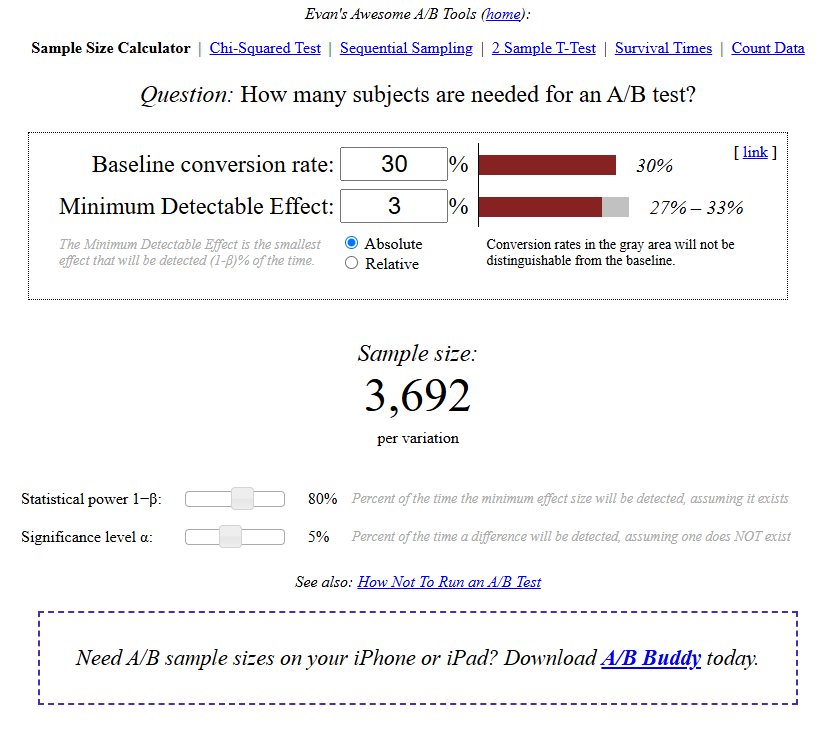

Исходя из ранее сделанных вычислений, мы помним, что в контрольной группе (А) содержится 5383 уникальных пользователей, а в тестовой группе (B) содержится 5351 уникальных пользователей. Следовательно, размер выборки достаточен для получения статичестически значимых результатов A/B-теста

### 2.7. Расчёт количество посетителей, сделавших покупку, для каждой группы и общего количества посетителей

Создадим датафрейм, включающий в себя идентификатор посетителя и название группы, в которую он входит

In [41]:
# Извлекаем идентификатор посетителя и название группы, в которую он входит

a_b_group = ab_test_participants[['user_id', 'group']]
a_b_group

,user_id,group
0,0002CE61FF2C4011,B
2,001064FEAAB631A1,A
4,001E72F50D1C48FA,A
5,002412F1EB3F6E38,B
6,002540BE89C930FB,B
...,...,...
14518,FFE5B14BD55C1C5C,A
14519,FFE600EEC4BA7685,B
14520,FFE7FC140521F5F6,A
14521,FFEFC0E55C1CCD4F,A


Объединим данные датафрейма `ab_test_events` и датафрейма `a_b_group`

In [42]:
# Объединяем данные датафрейма `ab_test_events` и датафрейма `a_b_group`

ab_test_events = ab_test_events.merge(a_b_group, on='user_id', how='left')
ab_test_events

,user_id,event_dt,event_name,details,registration_dt,after_registration_dt,group
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0,A
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0,A
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0,B
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0,A
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0,B
...,...,...,...,...,...,...,...
16964,96371D85BF5A99DD,2020-12-29 19:11:11,purchase,4.49,2020-12-23 13:16:19,6,B
16965,96371D85BF5A99DD,2020-12-29 19:12:42,purchase,89.99,2020-12-23 13:16:19,6,B
16966,2CD92B2BD7A136C2,2020-12-29 19:47:22,purchase,4.49,2020-12-22 22:27:30,6,B
16967,2CD92B2BD7A136C2,2020-12-29 19:47:38,purchase,4.49,2020-12-22 22:27:30,6,B


Рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей

In [43]:
# Рассчитываем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей

pivot_table_ab_test_events = ab_test_events[ab_test_events['event_name'].isin(['registration', 'purchase'])].pivot_table(index='group',
                                                                        columns='event_name',
                                                                        values='user_id',
                                                                        aggfunc='nunique')
pivot_table_ab_test_events

event_name,purchase,registration
group,,
A,1480,5383
B,1579,5351


Рассчитаем конверсию зарегистрированных пользователей в покупателей в %

In [44]:
# Рассчитываем конверсию зарегистрированных пользователей в покупателей в %

cr = (pivot_table_ab_test_events['purchase']/pivot_table_ab_test_events['registration'])*100
cr

group
A    27.493962
B    29.508503
dtype: float64

Определим разницу в значениях конверсии между контрольной и тестовой группами в %

In [45]:
# Определяем разницу в значениях конверсии между контрольной и тестовой группами в %

cr_diff = cr.values[1] - cr.values[0]
cr_diff

2.0145406090791624

Рассчитаем общее количество посетителей

In [46]:
# Рассчитываем общее количество посетителей

count_user_id = ab_test_events['user_id'].nunique()
print(f'Общее количество посетителей: {count_user_id}')

Общее количество посетителей: 10734


Общее количество посетителей составило 10734 человека

### 2.8. Предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной

Исходя из полученных вычислений, мы можем сделать предварительный вывод о том, что после упрощения интерфейса количество покупок в тестовой группе (B) увеличилось на 2 процентных пункта по сравнению с контрольной группой (A). То есть, конверсия зарегистрированных пользователей в покупателей увеличилась на 2 процентных пункта

### 2.9. Оценка результатов A/B-тестирования

#### 2.9.1. Проверка изменения конверсии подходящим статистическим тестом с учётом всех этапов проверки гипотез

Наиболее подходящим статистическим тестом будет являться Z-тест пропорций, поскольку диапазон значений нашей метрики колеблется от 0 до 1 (речь идёт о конверсии). Поэтому мы создадим перемеменные и внесём в них данные, необходимые для проведения статистического теста

In [47]:
# Создаём переменные с необходимыми данные для проведения статистического теста

n_a = pivot_table_ab_test_events['registration'][0]  # Размер группы A
n_b = pivot_table_ab_test_events['registration'][1] # Размер группы B
m_a = pivot_table_ab_test_events['purchase'][0] # Количество посетителей, соверших покупку в группе A
m_b = pivot_table_ab_test_events['purchase'][1] # Количество посетителей, соверших покупку в группе B

print(f'Размер группы A: {n_a}')
print(f'Размер группы B: {n_b}')
print(f'Количество посетителей, соверших покупку в группе A: {m_a}')
print(f'Количество посетителей, соверших покупку в группе B: {m_b}')

Размер группы A: 5383
Размер группы B: 5351
Количество посетителей, соверших покупку в группе A: 1480
Количество посетителей, соверших покупку в группе B: 1579


Рассчитаем, является ли изменение конверсии зарегистрированных пользователей в покупателей статистически значимым. Сформулируем гипотезы перед проведением теста:

- Нулевая гипотеза H₀: конверсия зарегистрированных пользователей в покупателей в группе B не выше, чем в группе A
- Альтернативная гипотеза H₁: конверсия зарегистрированных пользователей в покупателей в группе B выше, и это различие статистически значимо

Перед проведением теста проверим предпосылку о достаточном количестве данных для проведения Z-теста пропорций

In [48]:
# Проверяем предпосылку о достаточном количестве данных

p_a, p_b = m_a/n_a, m_b/n_b # доли покупок для каждой группы: A и B

if (p_a*n_a>10)and((1-p_a)*n_a>10)and(p_b*n_b>10)and((1-p_b)*n_b>10): 
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных не выполняется!')

Предпосылка о достаточном количестве данных выполняется!


Так мы убедились, что предпосылка о достаточном количестве данных выполняется. Именно она является условием для проведения Z-теста пропорций

In [49]:
# Устанавливаем уровень значимости

alpha = 0.05 

# Проводим статистический тест

stat_ztest, p_value_ztest = proportions_ztest(
  [m_b, m_a],
  [n_b, n_a],
  alternative='larger' # проводим Z-тест пропорций, H0: p_a >= p_b, H1: p_a < p_b, так как мы проверяем: значимо ли статистически изменение конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A
) 

if p_value_ztest > alpha:
    print(f'pvalue = {p_value_ztest} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Статистически значимое увеличение конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A - не наблюдается')
else:
    print(f'pvalue = {p_value_ztest} < {alpha}')
    print('Отвергаем нулевую гипотезу')
    print('Наблюдается статистически значимое увеличение конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A')

pvalue = 0.010393282955333764 < 0.05
Отвергаем нулевую гипотезу
Наблюдается статистически значимое увеличение конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A


Так как pvalue = 0.010393282955333764 < 0.05, мы можем сделать вывод о том, что мы отвергаем нулевую гипотезу. Это значит, что наблюдается статичестически значимое увеличение конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A при уровне значимости alpha = 0.05

#### 2.9.2. Описание выводов по проведённой оценке результатов A/B-тестирования

Характеристики проведённого эксперимента:

- Базовый показатель конверсии — 30%;
- Мощность теста — 80%;
- Достоверность теста — 95%;
- Минимальный детектируемый эффект, или MDE, — 3% (ожидаемый эффект от нововведения - увеличение конверсии зарегистрированных пользователей в покупателей как минимум на 3 процентных пункта);
- Необходимый размер выборки для каждой группы: 3962 пользователь.

На основе проведённого анализа результатов теста по вышезаданным параметрам мы можем сделать следующие выводы:

- Упрощение интерфейса увеличило конверсию зарегистрированных пользователей в покупателей на 2 процентных пункта.
- 0.010393282955333764 - значение p-value, которое использовалось для оценки статистической значимости выявленного эффекта
- Ожидаемый эффект в изменении конверсии - не достигнут, однако данное нововведение стоит внедрить в сайт, поскольку проведённый Z-тест пропорций показал, что существует статистически значимое различие конверсии зарегистрированных пользователей в покупателей в группе B по сравнению с группой A. Если быть точнее, то в тестовой группе B наблюдается статически значимое увеличение конверсии зарегистрированных пользователей в покупателей по сравнению с контрольной группой A на 2 процентных пункта. В будущем можно добиться ожидаемого эффекта в изменении конверсии, поскольку уже сейчас наблюдается положительная динамика